In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Titanic-Dataset.csv")

In [21]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [62]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C


In [34]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']] ##survived gotumurem #embarked lazim deyil mence neynirem hansi limandan minib 
y = df['Survived']


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.000000,1,0,7.2500
1,1,0,38.000000,1,0,71.2833
2,3,0,26.000000,0,0,7.9250
3,1,0,35.000000,1,0,53.1000
4,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000
887,1,0,19.000000,0,0,30.0000
888,3,0,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [29]:
def plot_model(model, train,y):
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.scatter(train['X'], train['Y'], c=y, cmap='jet')

    X, Y = np.meshgrid(np.linspace(train['X'].min(), train['X'].max(), 100), 
                np.linspace(train['Y'].min(), train['Y'].max(), 100))
    
    Z = model.predict(np.c_[X.ravel(), Y.ravel()])
    Z = Z.reshape(X.shape)

    ax.contourf(X, Y, Z, cmap='jet', alpha=.25)


In [30]:
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [57]:
print(confusion_matrix(y_test, y_pred))
#82 enefer olub ve model de duz deyib 22 nefer olub amma model sag qlaib deyir, 19 nefer sagdir model olub deyir, 56 nefer sagdir ve modelde  sagdir deyir
#891 test ucun 20 fazii 179 edir ve ondan baxir

[[82 22]
 [19 56]]


In [56]:
accuracy_score(y_test,y_pred) ##duzgun tpilan/ umumi serninisne nisbeti yeni model sernisinlrden necesini duz tapib sag qalib qlmadigni
#100 neferden 77 i sag qaliub qalmadigini duz texmin edib

0.770949720670391

<Axes: xlabel='Age', ylabel='Fare'>

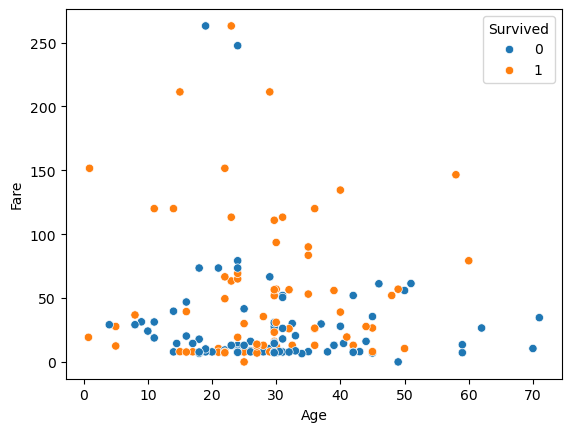

In [58]:
sns.scatterplot(data=x_test, x='Age', y='Fare', hue=y) #0-oldu 1-qaldi